<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 1.0006856	total: 60.5ms	remaining: 1m
1:	learn: 0.9804582	total: 63.4ms	remaining: 31.6s
2:	learn: 0.9582983	total: 65.8ms	remaining: 21.9s
3:	learn: 0.9409567	total: 68.3ms	remaining: 17s
4:	learn: 0.9223546	total: 70.8ms	remaining: 14.1s
5:	learn: 0.9048513	total: 73.2ms	remaining: 12.1s
6:	learn: 0.8896122	total: 75.7ms	remaining: 10.7s
7:	learn: 0.8725416	total: 78.2ms	remaining: 9.69s
8:	learn: 0.8571379	total: 80.6ms	remaining: 8.88s
9:	learn: 0.8415880	total: 83.2ms	remaining: 8.23s
10:	learn: 0.8281043	total: 85.6ms	remaining: 7.7s
11:	learn: 0.8136572	total: 88ms	remaining: 7.25s
12:	learn: 0.7976459	total: 90.5ms	remaining: 6.87s
13:	learn: 0.7821884	total: 93ms	remaining: 6.55s
14:	learn: 0.7692693	total: 95.4ms	remaining: 6.27s
15:	learn: 0.7538082	total: 97.8ms	remaining: 6.02s
16:	learn: 0.7405889	total: 100ms	remaining: 5.8s
17:	learn: 0.7287948	total: 103ms	remaining: 5.59s
18:	learn: 0.7168191	total: 105ms	remaining: 5.42s
19:	lea

41:	learn: 0.5105083	total: 177ms	remaining: 4.04s
42:	learn: 0.5036359	total: 180ms	remaining: 4.01s
43:	learn: 0.4980608	total: 186ms	remaining: 4.03s
44:	learn: 0.4925995	total: 188ms	remaining: 3.99s
45:	learn: 0.4858194	total: 192ms	remaining: 3.98s
46:	learn: 0.4808408	total: 195ms	remaining: 3.95s
47:	learn: 0.4751420	total: 200ms	remaining: 3.97s
48:	learn: 0.4693038	total: 203ms	remaining: 3.94s
49:	learn: 0.4639601	total: 205ms	remaining: 3.89s
50:	learn: 0.4587969	total: 207ms	remaining: 3.86s
51:	learn: 0.4545995	total: 210ms	remaining: 3.82s
52:	learn: 0.4500232	total: 218ms	remaining: 3.89s
53:	learn: 0.4463229	total: 220ms	remaining: 3.85s
54:	learn: 0.4417537	total: 223ms	remaining: 3.83s
55:	learn: 0.4376404	total: 225ms	remaining: 3.79s
56:	learn: 0.4342360	total: 227ms	remaining: 3.76s
57:	learn: 0.4293708	total: 230ms	remaining: 3.74s
58:	learn: 0.4248188	total: 233ms	remaining: 3.71s
59:	learn: 0.4207567	total: 236ms	remaining: 3.69s
60:	learn: 0.4176348	total: 238

91:	learn: 0.3252042	total: 333ms	remaining: 3.29s
92:	learn: 0.3237522	total: 336ms	remaining: 3.27s
93:	learn: 0.3215188	total: 338ms	remaining: 3.26s
94:	learn: 0.3198131	total: 340ms	remaining: 3.24s
95:	learn: 0.3184558	total: 343ms	remaining: 3.23s
96:	learn: 0.3165368	total: 345ms	remaining: 3.21s
97:	learn: 0.3145642	total: 347ms	remaining: 3.2s
98:	learn: 0.3128799	total: 350ms	remaining: 3.19s
99:	learn: 0.3117758	total: 353ms	remaining: 3.17s
100:	learn: 0.3095385	total: 355ms	remaining: 3.16s
101:	learn: 0.3079649	total: 358ms	remaining: 3.15s
102:	learn: 0.3063864	total: 360ms	remaining: 3.13s
103:	learn: 0.3047963	total: 363ms	remaining: 3.13s
104:	learn: 0.3024204	total: 366ms	remaining: 3.12s
105:	learn: 0.3010553	total: 368ms	remaining: 3.1s
106:	learn: 0.2993034	total: 371ms	remaining: 3.09s
107:	learn: 0.2978278	total: 373ms	remaining: 3.08s
108:	learn: 0.2968392	total: 375ms	remaining: 3.07s
109:	learn: 0.2952206	total: 378ms	remaining: 3.06s
110:	learn: 0.2939870	t

130:	learn: 0.2677805	total: 460ms	remaining: 3.05s
131:	learn: 0.2669500	total: 463ms	remaining: 3.04s
132:	learn: 0.2660501	total: 473ms	remaining: 3.08s
133:	learn: 0.2651883	total: 475ms	remaining: 3.07s
134:	learn: 0.2638777	total: 477ms	remaining: 3.06s
135:	learn: 0.2629679	total: 480ms	remaining: 3.05s
136:	learn: 0.2616198	total: 482ms	remaining: 3.04s
137:	learn: 0.2604332	total: 484ms	remaining: 3.02s
138:	learn: 0.2594438	total: 487ms	remaining: 3.01s
139:	learn: 0.2585528	total: 489ms	remaining: 3s
140:	learn: 0.2576763	total: 492ms	remaining: 2.99s
141:	learn: 0.2568524	total: 496ms	remaining: 3s
142:	learn: 0.2559617	total: 499ms	remaining: 2.99s
143:	learn: 0.2550614	total: 502ms	remaining: 2.99s
144:	learn: 0.2540246	total: 505ms	remaining: 2.98s
145:	learn: 0.2530907	total: 508ms	remaining: 2.97s
146:	learn: 0.2520805	total: 510ms	remaining: 2.96s
147:	learn: 0.2510447	total: 512ms	remaining: 2.95s
148:	learn: 0.2499611	total: 514ms	remaining: 2.94s
149:	learn: 0.2493

164:	learn: 0.2368502	total: 591ms	remaining: 2.99s
165:	learn: 0.2362356	total: 593ms	remaining: 2.98s
166:	learn: 0.2357523	total: 596ms	remaining: 2.97s
167:	learn: 0.2350613	total: 598ms	remaining: 2.96s
168:	learn: 0.2344890	total: 601ms	remaining: 2.96s
169:	learn: 0.2339444	total: 606ms	remaining: 2.96s
170:	learn: 0.2332311	total: 613ms	remaining: 2.97s
171:	learn: 0.2323988	total: 616ms	remaining: 2.96s
172:	learn: 0.2316315	total: 619ms	remaining: 2.96s
173:	learn: 0.2312391	total: 621ms	remaining: 2.95s
174:	learn: 0.2308239	total: 624ms	remaining: 2.94s
175:	learn: 0.2303705	total: 627ms	remaining: 2.94s
176:	learn: 0.2295378	total: 630ms	remaining: 2.93s
177:	learn: 0.2286442	total: 632ms	remaining: 2.92s
178:	learn: 0.2280219	total: 635ms	remaining: 2.91s
179:	learn: 0.2274008	total: 637ms	remaining: 2.9s
180:	learn: 0.2266230	total: 640ms	remaining: 2.89s
181:	learn: 0.2259249	total: 642ms	remaining: 2.89s
182:	learn: 0.2253078	total: 644ms	remaining: 2.88s
183:	learn: 0

224:	learn: 0.1992972	total: 754ms	remaining: 2.6s
225:	learn: 0.1986990	total: 757ms	remaining: 2.59s
226:	learn: 0.1980299	total: 760ms	remaining: 2.59s
227:	learn: 0.1975857	total: 762ms	remaining: 2.58s
228:	learn: 0.1970891	total: 765ms	remaining: 2.58s
229:	learn: 0.1967518	total: 768ms	remaining: 2.57s
230:	learn: 0.1964669	total: 770ms	remaining: 2.56s
231:	learn: 0.1959301	total: 772ms	remaining: 2.56s
232:	learn: 0.1954174	total: 774ms	remaining: 2.55s
233:	learn: 0.1948944	total: 776ms	remaining: 2.54s
234:	learn: 0.1941989	total: 779ms	remaining: 2.53s
235:	learn: 0.1939362	total: 781ms	remaining: 2.53s
236:	learn: 0.1933624	total: 783ms	remaining: 2.52s
237:	learn: 0.1929271	total: 785ms	remaining: 2.51s
238:	learn: 0.1921983	total: 787ms	remaining: 2.5s
239:	learn: 0.1915000	total: 789ms	remaining: 2.5s
240:	learn: 0.1909805	total: 792ms	remaining: 2.49s
241:	learn: 0.1906208	total: 794ms	remaining: 2.49s
242:	learn: 0.1899584	total: 797ms	remaining: 2.48s
243:	learn: 0.1

293:	learn: 0.1668143	total: 928ms	remaining: 2.23s
294:	learn: 0.1664818	total: 930ms	remaining: 2.22s
295:	learn: 0.1659795	total: 933ms	remaining: 2.22s
296:	learn: 0.1654250	total: 935ms	remaining: 2.21s
297:	learn: 0.1650752	total: 936ms	remaining: 2.21s
298:	learn: 0.1644169	total: 939ms	remaining: 2.2s
299:	learn: 0.1642307	total: 941ms	remaining: 2.19s
300:	learn: 0.1638804	total: 943ms	remaining: 2.19s
301:	learn: 0.1633509	total: 945ms	remaining: 2.19s
302:	learn: 0.1629773	total: 948ms	remaining: 2.18s
303:	learn: 0.1626736	total: 950ms	remaining: 2.17s
304:	learn: 0.1624060	total: 952ms	remaining: 2.17s
305:	learn: 0.1621350	total: 954ms	remaining: 2.16s
306:	learn: 0.1617549	total: 957ms	remaining: 2.16s
307:	learn: 0.1614636	total: 959ms	remaining: 2.15s
308:	learn: 0.1609572	total: 961ms	remaining: 2.15s
309:	learn: 0.1607568	total: 964ms	remaining: 2.15s
310:	learn: 0.1603002	total: 966ms	remaining: 2.14s
311:	learn: 0.1598361	total: 969ms	remaining: 2.14s
312:	learn: 0

357:	learn: 0.1446442	total: 1.09s	remaining: 1.95s
358:	learn: 0.1444403	total: 1.09s	remaining: 1.95s
359:	learn: 0.1442375	total: 1.09s	remaining: 1.94s
360:	learn: 0.1438285	total: 1.09s	remaining: 1.94s
361:	learn: 0.1434177	total: 1.1s	remaining: 1.94s
362:	learn: 0.1431225	total: 1.1s	remaining: 1.93s
363:	learn: 0.1428137	total: 1.1s	remaining: 1.93s
364:	learn: 0.1425314	total: 1.1s	remaining: 1.92s
365:	learn: 0.1420550	total: 1.11s	remaining: 1.92s
366:	learn: 0.1419546	total: 1.11s	remaining: 1.91s
367:	learn: 0.1416646	total: 1.11s	remaining: 1.91s
368:	learn: 0.1414072	total: 1.11s	remaining: 1.9s
369:	learn: 0.1410175	total: 1.11s	remaining: 1.9s
370:	learn: 0.1407879	total: 1.12s	remaining: 1.91s
371:	learn: 0.1407012	total: 1.13s	remaining: 1.9s
372:	learn: 0.1404417	total: 1.14s	remaining: 1.91s
373:	learn: 0.1401644	total: 1.16s	remaining: 1.94s
374:	learn: 0.1400004	total: 1.16s	remaining: 1.93s
375:	learn: 0.1395398	total: 1.16s	remaining: 1.93s
376:	learn: 0.13916

378:	learn: 0.1387365	total: 1.26s	remaining: 2.07s
379:	learn: 0.1384719	total: 1.27s	remaining: 2.07s
380:	learn: 0.1383003	total: 1.27s	remaining: 2.06s
381:	learn: 0.1381936	total: 1.27s	remaining: 2.06s
382:	learn: 0.1379799	total: 1.28s	remaining: 2.06s
383:	learn: 0.1376895	total: 1.28s	remaining: 2.06s
384:	learn: 0.1375715	total: 1.29s	remaining: 2.06s
385:	learn: 0.1371922	total: 1.29s	remaining: 2.05s
386:	learn: 0.1367732	total: 1.29s	remaining: 2.05s
387:	learn: 0.1364133	total: 1.29s	remaining: 2.04s
388:	learn: 0.1362157	total: 1.3s	remaining: 2.04s
389:	learn: 0.1357626	total: 1.3s	remaining: 2.03s
390:	learn: 0.1355075	total: 1.3s	remaining: 2.03s
391:	learn: 0.1352396	total: 1.31s	remaining: 2.02s
392:	learn: 0.1350877	total: 1.31s	remaining: 2.02s
393:	learn: 0.1347094	total: 1.31s	remaining: 2.02s
394:	learn: 0.1344357	total: 1.32s	remaining: 2.02s
395:	learn: 0.1341045	total: 1.32s	remaining: 2.01s
396:	learn: 0.1339151	total: 1.32s	remaining: 2.01s
397:	learn: 0.1

437:	learn: 0.1232448	total: 1.43s	remaining: 1.83s
438:	learn: 0.1230188	total: 1.43s	remaining: 1.83s
439:	learn: 0.1227217	total: 1.43s	remaining: 1.82s
440:	learn: 0.1223585	total: 1.43s	remaining: 1.82s
441:	learn: 0.1221302	total: 1.44s	remaining: 1.81s
442:	learn: 0.1218925	total: 1.44s	remaining: 1.81s
443:	learn: 0.1217381	total: 1.45s	remaining: 1.82s
444:	learn: 0.1214491	total: 1.45s	remaining: 1.81s
445:	learn: 0.1211006	total: 1.46s	remaining: 1.81s
446:	learn: 0.1207549	total: 1.46s	remaining: 1.8s
447:	learn: 0.1207122	total: 1.46s	remaining: 1.8s
448:	learn: 0.1204548	total: 1.46s	remaining: 1.8s
449:	learn: 0.1202283	total: 1.47s	remaining: 1.79s
450:	learn: 0.1200511	total: 1.47s	remaining: 1.79s
451:	learn: 0.1198487	total: 1.47s	remaining: 1.78s
452:	learn: 0.1197206	total: 1.47s	remaining: 1.78s
453:	learn: 0.1195260	total: 1.48s	remaining: 1.78s
454:	learn: 0.1191957	total: 1.48s	remaining: 1.77s
455:	learn: 0.1189519	total: 1.48s	remaining: 1.77s
456:	learn: 0.1

495:	learn: 0.1097156	total: 1.6s	remaining: 1.63s
496:	learn: 0.1096626	total: 1.61s	remaining: 1.63s
497:	learn: 0.1096265	total: 1.61s	remaining: 1.62s
498:	learn: 0.1094691	total: 1.62s	remaining: 1.62s
499:	learn: 0.1094268	total: 1.62s	remaining: 1.62s
500:	learn: 0.1092341	total: 1.62s	remaining: 1.61s
501:	learn: 0.1091824	total: 1.62s	remaining: 1.61s
502:	learn: 0.1087911	total: 1.63s	remaining: 1.61s
503:	learn: 0.1085551	total: 1.63s	remaining: 1.6s
504:	learn: 0.1083403	total: 1.63s	remaining: 1.6s
505:	learn: 0.1081631	total: 1.63s	remaining: 1.59s
506:	learn: 0.1080244	total: 1.64s	remaining: 1.59s
507:	learn: 0.1077664	total: 1.64s	remaining: 1.59s
508:	learn: 0.1076286	total: 1.64s	remaining: 1.58s
509:	learn: 0.1072927	total: 1.64s	remaining: 1.58s
510:	learn: 0.1072423	total: 1.65s	remaining: 1.57s
511:	learn: 0.1070020	total: 1.65s	remaining: 1.57s
512:	learn: 0.1068125	total: 1.65s	remaining: 1.57s
513:	learn: 0.1066103	total: 1.65s	remaining: 1.56s
514:	learn: 0.1

565:	learn: 0.0973041	total: 1.78s	remaining: 1.36s
566:	learn: 0.0970251	total: 1.78s	remaining: 1.36s
567:	learn: 0.0969195	total: 1.78s	remaining: 1.35s
568:	learn: 0.0968787	total: 1.78s	remaining: 1.35s
569:	learn: 0.0966570	total: 1.79s	remaining: 1.35s
570:	learn: 0.0964220	total: 1.79s	remaining: 1.34s
571:	learn: 0.0962651	total: 1.79s	remaining: 1.34s
572:	learn: 0.0960902	total: 1.79s	remaining: 1.34s
573:	learn: 0.0958235	total: 1.8s	remaining: 1.33s
574:	learn: 0.0957053	total: 1.8s	remaining: 1.33s
575:	learn: 0.0955415	total: 1.8s	remaining: 1.32s
576:	learn: 0.0953161	total: 1.8s	remaining: 1.32s
577:	learn: 0.0951097	total: 1.8s	remaining: 1.32s
578:	learn: 0.0950672	total: 1.81s	remaining: 1.31s
579:	learn: 0.0948136	total: 1.81s	remaining: 1.31s
580:	learn: 0.0945877	total: 1.81s	remaining: 1.31s
581:	learn: 0.0943375	total: 1.82s	remaining: 1.31s
582:	learn: 0.0940907	total: 1.82s	remaining: 1.3s
583:	learn: 0.0939492	total: 1.82s	remaining: 1.3s
584:	learn: 0.09381

623:	learn: 0.0874304	total: 1.95s	remaining: 1.17s
624:	learn: 0.0871925	total: 1.95s	remaining: 1.17s
625:	learn: 0.0869817	total: 1.95s	remaining: 1.17s
626:	learn: 0.0867544	total: 1.95s	remaining: 1.16s
627:	learn: 0.0865822	total: 1.96s	remaining: 1.16s
628:	learn: 0.0864359	total: 1.96s	remaining: 1.16s
629:	learn: 0.0862895	total: 1.96s	remaining: 1.15s
630:	learn: 0.0861381	total: 1.96s	remaining: 1.15s
631:	learn: 0.0859512	total: 1.97s	remaining: 1.14s
632:	learn: 0.0858428	total: 1.97s	remaining: 1.14s
633:	learn: 0.0856816	total: 1.97s	remaining: 1.14s
634:	learn: 0.0856329	total: 1.98s	remaining: 1.14s
635:	learn: 0.0855542	total: 1.98s	remaining: 1.14s
636:	learn: 0.0853848	total: 1.99s	remaining: 1.13s
637:	learn: 0.0851972	total: 1.99s	remaining: 1.13s
638:	learn: 0.0849543	total: 1.99s	remaining: 1.13s
639:	learn: 0.0847495	total: 1.99s	remaining: 1.12s
640:	learn: 0.0847084	total: 2s	remaining: 1.12s
641:	learn: 0.0845271	total: 2s	remaining: 1.12s
642:	learn: 0.0843

670:	learn: 0.0803440	total: 2.09s	remaining: 1.02s
671:	learn: 0.0803038	total: 2.09s	remaining: 1.02s
672:	learn: 0.0801955	total: 2.09s	remaining: 1.02s
673:	learn: 0.0799750	total: 2.1s	remaining: 1.01s
674:	learn: 0.0798191	total: 2.1s	remaining: 1.01s
675:	learn: 0.0796976	total: 2.1s	remaining: 1.01s
676:	learn: 0.0795935	total: 2.1s	remaining: 1s
677:	learn: 0.0795623	total: 2.11s	remaining: 1s
678:	learn: 0.0793651	total: 2.11s	remaining: 997ms
679:	learn: 0.0792379	total: 2.11s	remaining: 993ms
680:	learn: 0.0792161	total: 2.11s	remaining: 990ms
681:	learn: 0.0790928	total: 2.12s	remaining: 986ms
682:	learn: 0.0789309	total: 2.12s	remaining: 983ms
683:	learn: 0.0788325	total: 2.12s	remaining: 980ms
684:	learn: 0.0787428	total: 2.12s	remaining: 976ms
685:	learn: 0.0787166	total: 2.12s	remaining: 973ms
686:	learn: 0.0785915	total: 2.13s	remaining: 969ms
687:	learn: 0.0784129	total: 2.13s	remaining: 966ms
688:	learn: 0.0783220	total: 2.13s	remaining: 962ms
689:	learn: 0.0782231	

736:	learn: 0.0726670	total: 2.27s	remaining: 809ms
737:	learn: 0.0725675	total: 2.27s	remaining: 806ms
738:	learn: 0.0723989	total: 2.27s	remaining: 802ms
739:	learn: 0.0722667	total: 2.27s	remaining: 799ms
740:	learn: 0.0721901	total: 2.27s	remaining: 795ms
741:	learn: 0.0720005	total: 2.28s	remaining: 792ms
742:	learn: 0.0719324	total: 2.28s	remaining: 789ms
743:	learn: 0.0718465	total: 2.28s	remaining: 785ms
744:	learn: 0.0718013	total: 2.28s	remaining: 782ms
745:	learn: 0.0716799	total: 2.29s	remaining: 779ms
746:	learn: 0.0716324	total: 2.29s	remaining: 775ms
747:	learn: 0.0715058	total: 2.29s	remaining: 772ms
748:	learn: 0.0713799	total: 2.29s	remaining: 769ms
749:	learn: 0.0712477	total: 2.29s	remaining: 765ms
750:	learn: 0.0712112	total: 2.3s	remaining: 762ms
751:	learn: 0.0710692	total: 2.3s	remaining: 759ms
752:	learn: 0.0709099	total: 2.3s	remaining: 755ms
753:	learn: 0.0707846	total: 2.31s	remaining: 752ms
754:	learn: 0.0706704	total: 2.31s	remaining: 749ms
755:	learn: 0.0

810:	learn: 0.0647217	total: 2.44s	remaining: 569ms
811:	learn: 0.0645567	total: 2.44s	remaining: 566ms
812:	learn: 0.0644255	total: 2.45s	remaining: 563ms
813:	learn: 0.0643292	total: 2.45s	remaining: 560ms
814:	learn: 0.0643062	total: 2.45s	remaining: 556ms
815:	learn: 0.0642600	total: 2.45s	remaining: 553ms
816:	learn: 0.0642011	total: 2.46s	remaining: 550ms
817:	learn: 0.0641378	total: 2.46s	remaining: 547ms
818:	learn: 0.0640351	total: 2.46s	remaining: 544ms
819:	learn: 0.0638977	total: 2.46s	remaining: 541ms
820:	learn: 0.0637761	total: 2.46s	remaining: 538ms
821:	learn: 0.0636804	total: 2.47s	remaining: 534ms
822:	learn: 0.0636674	total: 2.47s	remaining: 531ms
823:	learn: 0.0635974	total: 2.47s	remaining: 528ms
824:	learn: 0.0634300	total: 2.47s	remaining: 525ms
825:	learn: 0.0633374	total: 2.48s	remaining: 522ms
826:	learn: 0.0632076	total: 2.48s	remaining: 519ms
827:	learn: 0.0630867	total: 2.48s	remaining: 516ms
828:	learn: 0.0629820	total: 2.48s	remaining: 512ms
829:	learn: 

886:	learn: 0.0585755	total: 2.62s	remaining: 333ms
887:	learn: 0.0584745	total: 2.62s	remaining: 330ms
888:	learn: 0.0583256	total: 2.62s	remaining: 327ms
889:	learn: 0.0582974	total: 2.62s	remaining: 324ms
890:	learn: 0.0581627	total: 2.63s	remaining: 321ms
891:	learn: 0.0580793	total: 2.63s	remaining: 318ms
892:	learn: 0.0579181	total: 2.63s	remaining: 315ms
893:	learn: 0.0578628	total: 2.63s	remaining: 312ms
894:	learn: 0.0577925	total: 2.63s	remaining: 309ms
895:	learn: 0.0577664	total: 2.64s	remaining: 306ms
896:	learn: 0.0576660	total: 2.64s	remaining: 303ms
897:	learn: 0.0576542	total: 2.64s	remaining: 300ms
898:	learn: 0.0575173	total: 2.64s	remaining: 297ms
899:	learn: 0.0574784	total: 2.65s	remaining: 294ms
900:	learn: 0.0574293	total: 2.65s	remaining: 291ms
901:	learn: 0.0573116	total: 2.65s	remaining: 288ms
902:	learn: 0.0571834	total: 2.65s	remaining: 285ms
903:	learn: 0.0571331	total: 2.66s	remaining: 282ms
904:	learn: 0.0570380	total: 2.66s	remaining: 279ms
905:	learn: 

959:	learn: 0.0526771	total: 2.79s	remaining: 116ms
960:	learn: 0.0526231	total: 2.79s	remaining: 113ms
961:	learn: 0.0525107	total: 2.8s	remaining: 110ms
962:	learn: 0.0524899	total: 2.8s	remaining: 108ms
963:	learn: 0.0524129	total: 2.8s	remaining: 105ms
964:	learn: 0.0522905	total: 2.8s	remaining: 102ms
965:	learn: 0.0522548	total: 2.81s	remaining: 98.8ms
966:	learn: 0.0521102	total: 2.81s	remaining: 95.9ms
967:	learn: 0.0520319	total: 2.81s	remaining: 92.9ms
968:	learn: 0.0519421	total: 2.81s	remaining: 90ms
969:	learn: 0.0519157	total: 2.82s	remaining: 87.1ms
970:	learn: 0.0518304	total: 2.82s	remaining: 84.2ms
971:	learn: 0.0518189	total: 2.82s	remaining: 81.3ms
972:	learn: 0.0517206	total: 2.82s	remaining: 78.4ms
973:	learn: 0.0516015	total: 2.83s	remaining: 75.5ms
974:	learn: 0.0515203	total: 2.83s	remaining: 72.6ms
975:	learn: 0.0514209	total: 2.83s	remaining: 69.6ms
976:	learn: 0.0513958	total: 2.83s	remaining: 66.7ms
977:	learn: 0.0513089	total: 2.84s	remaining: 63.8ms
978:	

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19927230794372686
ABC Pre-generator MAE 0.19716287127766863


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

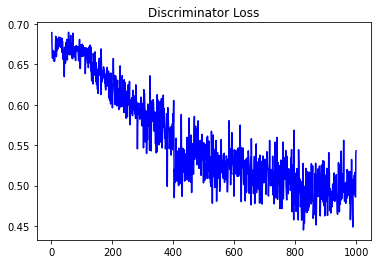

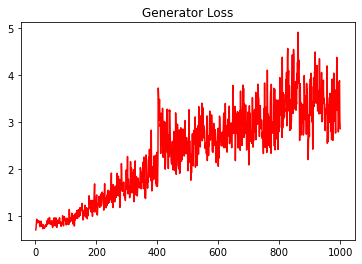

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.20696058660033434


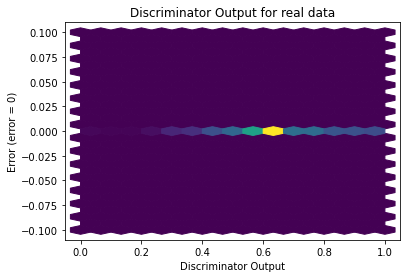

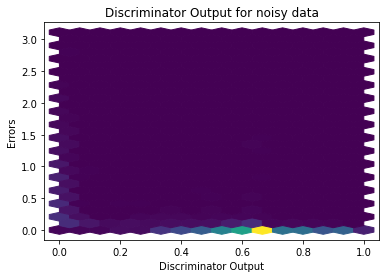

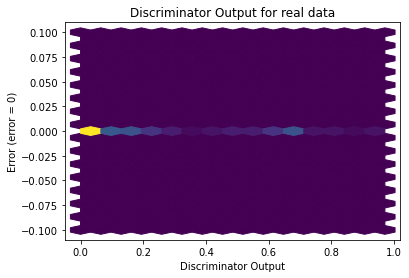

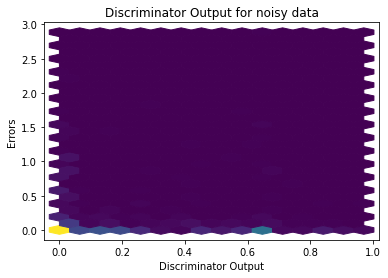

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())